In [6]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import models
from skimage.io import imshow , imsave
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import pathlib
import keras.backend as K
from skimage.io import imread
from skimage.viewer import ImageViewer

import skimage
import skimage.transform
import skimage.color
import math

import matplotlib.pyplot as plt
import numpy as np

import os

from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation, Flatten, Dense, Reshape
from keras.models import Model

import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, BatchNormalization, UpSampling2D, Dense, Reshape, Input, Flatten

In [22]:
def cleanup_dir(dir_path):
    file_list = os.listdir(dir_path)

    for f in file_list:
        image_path = os.path.join(dir_path, f)
        image = readColorImageFromFile(image_path)

        if image.ndim != 3:
            os.system('rm -f {0}'.format(image_path))

def resizeImage(image, new_height, new_width):
    """
    Assumes channels_last keras encoding - tensorflow default.
    :param image:
    :param new_height:
    :param new_width:
    :return: resized image with the same number of channels.
    """
    # shape returns height, width, channels
    if image.ndim == 2:
        resized = skimage.transform.resize(image=image, output_shape=(new_height, new_width))
    else:
        resized = skimage.transform.resize(image=image, output_shape=(new_height, new_width, image.shape[2]))
    return resized

def get_lab(image):
    image_lab = skimage.color.rgb2lab(image)
    l = image_lab[:, :, 0:1]
    ab = image_lab[:, :, 1:]
    return l, ab

def merge_l_ab(l, ab):
    ab_resized = resizeImage(ab, l.shape[0], l.shape[1])
    merged = np.concatenate((l, ab_resized), axis=2)
    return merged

def displayImage(image):
    viewer = ImageViewer(image)
    viewer.show()


def readColorImageFromFile(filePath, as_grey=False):
    return skimage.img_as_float(imread(fname=filePath))


def readColorImageFromUrl(url, as_grey=False):
    return skimage.img_as_float(imread(url, as_grey=as_grey))


# 2d float array with range 0 to 1
def convertImageToGray2D(image):
    return skimage.color.rgb2grey(image)


def convertImageToGrayRGB(image):
    return skimage.color.gray2rgb(skimage.color.rgb2grey(image))


def convertLabToRgb(image):
    return skimage.color.lab2rgb(image)

def displayListOfImagesInGrid(imageList, pairUp=False):
    numImages = len(imageList)
    numCols = int(math.ceil(math.sqrt(numImages)))
    if numCols % 2 != 0:
        numCols += 1
    numRows = int(math.ceil(numImages / numCols))

    if pairUp:
        numCols /= 2

    print("Num images: {}\trows{}\tcols{}".format(numImages, numRows, numCols))

    base_fig = plt.figure()
    subplotNum = 0

    for i in xrange(0, numRows):
        for j in xrange(0, numCols):

            subplotNum += 1
            img_index = subplotNum - 1
            # TODO:pairUp is prolly messed up.

            if img_index >= numImages:
                break
            img = imageList[img_index]

            if pairUp:
                img_index += 1
                j += 1
                img2 = imageList[img_index]
                img = np.hstack((img, img2))

            subplot = base_fig.add_subplot(numRows, numCols, subplotNum)
            subplot.set_title(img_index)
            imgplot = plt.imshow(img)

    plt.show()

def get_ab_bin_weights():
    AB_BIN_FREQS = [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   1.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   1.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   1.00000000e+00,   3.00000000e+00,   1.00000000e+00,   1.00000000e+00,   2.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   1.00000000e+00,   0.00000000e+00,   1.00000000e+00,   0.00000000e+00,   8.00000000e+00,   1.20000000e+01,   5.00000000e+00,   4.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   4.00000000e+00,   3.40000000e+01,   4.30000000e+01,   7.00000000e+00,   4.50000000e+01,   7.20000000e+01,   1.43000000e+02,   1.41000000e+02,   5.10000000e+01,   1.50000000e+01,   2.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   1.10000000e+01,   5.70000000e+01,   9.80000000e+01,   8.20000000e+01,   1.84000000e+02,   4.89000000e+02,   1.16600000e+03,   1.16200000e+03,   6.26000000e+02,   1.93000000e+02,   3.30000000e+01,   4.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   2.00000000e+00,   1.17000000e+02,   5.45000000e+02,   1.13900000e+03,   9.58000000e+02,   9.85000000e+02,   2.06100000e+03,   5.11800000e+03,   7.10700000e+03,   4.55700000e+03,   1.41500000e+03,   3.35000000e+02,   5.90000000e+01,   1.10000000e+01,   3.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   2.66000000e+02,   1.70300000e+03,   5.15900000e+03,   7.87300000e+03,   1.02690000e+04,   1.20980000e+04,   2.26550000e+04,   2.42960000e+04,   1.49030000e+04,   5.34000000e+03,   1.41100000e+03,   3.85000000e+02,   1.49000000e+02,   4.60000000e+01,   2.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   1.35000000e+02,   2.80200000e+03,   1.63060000e+04,   4.06660000e+04,   7.50860000e+04,   1.47989000e+05,   2.09351000e+05,   6.98960000e+04,   3.00650000e+04,   1.03820000e+04,   3.09900000e+03,   8.73000000e+02,   2.33000000e+02,   8.10000000e+01,   2.40000000e+01,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   8.80000000e+01,   1.97800000e+03,   9.55500000e+03,   1.87210000e+04,   2.46440000e+04,   4.02270000e+04,   1.14649000e+05,   1.09503000e+05,   6.42830000e+04,   2.80300000e+04,   8.69000000e+03,   2.51200000e+03,   7.63000000e+02,   1.46000000e+02,   4.70000000e+01,   1.50000000e+01,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   7.00000000e+00,   5.22000000e+02,   2.63900000e+03,   3.87200000e+03,   2.93700000e+03,   2.06000000e+03,   1.77200000e+03,   2.89300000e+03,   7.05900000e+03,   1.26010000e+04,   1.22930000e+04,   5.71100000e+03,   2.03600000e+03,   6.40000000e+02,   2.17000000e+02,   9.10000000e+01,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   2.05000000e+02,   5.88000000e+02,   8.74000000e+02,   7.72000000e+02,   3.33000000e+02,   1.14000000e+02,   1.78000000e+02,   2.64000000e+02,   7.31000000e+02,   2.00100000e+03,   3.49800000e+03,   2.88100000e+03,   1.28900000e+03,   4.29000000e+02,   1.14000000e+02,   2.70000000e+01,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   2.90000000e+01,   1.99000000e+02,   2.49000000e+02,   1.89000000e+02,   6.20000000e+01,   2.10000000e+01,   1.70000000e+01,   3.40000000e+01,   5.50000000e+01,   1.13000000e+02,   2.76000000e+02,   6.77000000e+02,   1.13300000e+03,   9.99000000e+02,   3.84000000e+02,   8.70000000e+01,   1.20000000e+01,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   4.80000000e+01,   6.40000000e+01,   3.60000000e+01,   9.00000000e+00,   3.00000000e+00,   8.00000000e+00,   1.70000000e+01,   9.00000000e+00,   1.90000000e+01,   3.00000000e+01,   1.11000000e+02,   1.26000000e+02,   2.06000000e+02,   1.90000000e+02,   2.18000000e+02,   7.20000000e+01,   1.10000000e+01,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   7.00000000e+00,   1.30000000e+01,   5.00000000e+00,   0.00000000e+00,   2.00000000e+00,   5.00000000e+00,   7.00000000e+00,   1.00000000e+01,   5.00000000e+00,   6.00000000e+00,   1.90000000e+01,   6.40000000e+01,   7.40000000e+01,   6.00000000e+01,   4.10000000e+01,   1.40000000e+01,   2.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   1.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   2.00000000e+00,   2.00000000e+00,   1.00000000e+00,   0.00000000e+00,   2.00000000e+00,   3.00000000e+00,   4.00000000e+00,   8.00000000e+00,   2.90000000e+01,   2.70000000e+01,   3.30000000e+01,   6.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   2.00000000e+00,   6.00000000e+00,   2.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   1.00000000e+00,   6.00000000e+00,   1.10000000e+01,   6.00000000e+00,   1.00000000e+01,   3.30000000e+01,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   1.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   2.00000000e+00,   0.00000000e+00,   1.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   1.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00  ]
    # AB_BIN_FREQS = [c + 1 for c in AB_BIN_FREQS]

    AB_BIN_FREQS = [float(c) / sum(AB_BIN_FREQS) for c in AB_BIN_FREQS]

    AB_BIN_WEIGHTS = [0.5 * c + 0.5 / len(AB_BIN_FREQS) for c in AB_BIN_FREQS]
    AB_BIN_WEIGHTS = [1.0 / w for w in AB_BIN_WEIGHTS]

    AB_BIN_WEIGHTS = [w / sum(AB_BIN_WEIGHTS) for w in AB_BIN_WEIGHTS]

    print (AB_BIN_WEIGHTS)

def get_lab_resized(image_path, l_size, ab_size):
    image = readColorImageFromFile(image_path)

    image_lab = skimage.color.rgb2lab(image)
    l = image_lab[:, :, 0:1]
    ab = image_lab[:, :, 1:]

    l = resizeImage(l, l_size, l_size)
    ab = resizeImage(ab, ab_size, ab_size)

    return l, ab

def create_dataset_v2(dir_path, l_size, ab_size):
    file_list = os.listdir(dir_path)
    num_images = len(file_list)

    l_channel = np.zeros((num_images, l_size, l_size, 1))
    ab_channels = np.zeros((num_images, ab_size, ab_size, 2))

    image_index = 0

    for i, f in enumerate(file_list):
        image_path = os.path.join(dir_path, f)
        image = readColorImageFromFile(image_path)

        # Remove (Some) Grayscale
        # TODO: Can do better. look at channels and remove if max a,b = 0?
        if image.ndim < 3:
            continue

        l, ab = get_lab(image)

        l = resizeImage(l, l_size, l_size)
        ab = resizeImage(ab, ab_size, ab_size)

        l_channel[image_index] = l
        ab_channels[image_index] = ab
        image_index += 1

    l_channel = l_channel[0:image_index, :, :, :]
    ab_channels = ab_channels[0:image_index]

    ab_onehot, ab_bin_frequencies = encode_ab(ab_channels)

    if debugLevel <= 2:
        print('create_datset_v2 : valid 3d images : l_channels shape: {}\nab_channels shape:{}\nab_channels after one-hot shape: {}'.format(l_channel.shape, ab_channels.shape, ab_onehot.shape))

    return l_channel, ab_onehot, ab_bin_frequencies, ab_channels

def encode_ab(ab_channels):
    num_images = ab_channels.shape[0]
    img_height = ab_channels.shape[1]
    img_width = ab_channels.shape[2]

    one_hot = np.zeros((num_images, img_height, img_width, NUM_BINS * NUM_BINS), dtype = np.bool)

    ab_bin_freqs = np.zeros(NUM_BINS * NUM_BINS, dtype=np.float64)

    a_bins = np.digitize(ab_channels[:, :, :, 0], BIN_EDGES)
    b_bins = np.digitize(ab_channels[:, :, :, 1], BIN_EDGES)

    ab_bins = a_bins * NUM_BINS + b_bins

    for n in range(num_images):
        for i in range(img_height):
            for j in range(img_width):
                one_hot[n, i, j, ab_bins[n, i, j]] = 1
                ab_bin_freqs[ab_bins[n, i, j]] += 1

    return one_hot, ab_bin_freqs


def decode_ab(n_one_hots):
    ab_channels = np.zeros((n_one_hots.shape[0], n_one_hots.shape[1], n_one_hots.shape[2], 2))

    for n in range(n_one_hots.shape[0]):
        for i in range(n_one_hots.shape[1]):
            for j in range(n_one_hots.shape[2]):
                index = np.argmax(n_one_hots[n, i, j])
                a_index = index / NUM_BINS
                b_index = index % NUM_BINS

                ab_channels[n, i, j, 0] = BIN_CENTERS[a_index]
                ab_channels[n, i, j, 1] = BIN_CENTERS[b_index]

    return ab_channels

def preview_lab_image(img_path, height=128, width=128):
    fig, ax = plt.subplots(1, 6, figsize = (18, 30))
    
    image = readColorImageFromFile(img_path)
    l, ab = get_lab(image)
    merged = merge_l_ab(l, ab)
    
    ax[0].imshow(image) # * [100, 255, 255] - [0, 128, 128])) 
    ax[0].axis('off')
    ax[0].set_title('Original')
    
    ax[1].imshow(merged) 
    ax[1].axis('off')
    ax[1].set_title('Lab')
    
    ax[2].imshow(l[:,:,0], cmap='gray') 
    ax[2].axis('off')
    ax[2].set_title('L')

    ax[3].imshow(ab[:,:,0], cmap='RdYlGn_r') 
    ax[3].axis('off')
    ax[3].set_title('a')

    ax[4].imshow(ab[:,:,1], cmap='YlGnBu_r') 
    ax[4].axis('off')
    ax[4].set_title('b')
    
    
    z=np.zeros((ab.shape[0], ab.shape[1], 1))
    q= np.concatenate((z,ab), axis=2)

    ax[5].imshow(q)
    ax[5].axis('off')
    ax[5].set_title('ab')

    plt.show()
    
def predict_and_show(image_path):
    image = readColorImageFromFile(image_path)
    original_width = image.shape[0]
    original_heigth = image.shape[1]
    l,ab = get_lab_resized(image_path, 224, 224)
    

    # Use only L channel (grayscale) to predict
    image_to_predict = tf.expand_dims(l, 0) #input should be four dimensional

    # Predict
    prediction = model.predict(image_to_predict)
    
    #Merge L, ab channels to create picture
    merged = np.concatenate((image_to_predict, prediction), axis=3)
    
    #convert Lab to RGB
    predicted_image = convertLabToRgb(merged)
    
    #Resize preicted picture to the aspect ratio of the original image
    predicted_image_original_size = resizeImage(predicted_image[0,:,:,:], original_width, original_heigth)
    
    plt.figure(figsize=(10, 10))

    plt.subplot(1, 2, 1)        
    plt.imshow(image)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(predicted_image_original_size)
    plt.title("Predicted")
    plt.axis("off")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


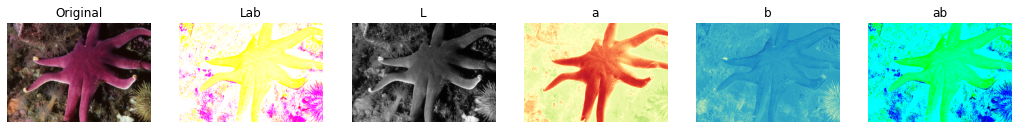

In [3]:
image_path = "C:/Users/danie/Documents/The London School of Economics/ST449 Artificial Intelligence and Deep Learning/Project/Train Data1/data/0001x2.png"
preview_lab_image(image_path)

In [4]:
BIN_LENGTH = 10
BIN_CENTERS = np.array(range(-105, 106, BIN_LENGTH))
BIN_EDGES = (BIN_CENTERS[:-1] + BIN_CENTERS[1:]) / 2
NUM_BINS = len(BIN_EDGES) + 1
debugLevel = 2

train_dir_path = "C:/Users/danie/Documents/The London School of Economics/ST449 Artificial Intelligence and Deep Learning/Project/Train Data/data"
train_l_channel, train_one_hot_ab, train_ab_bin_frequencies, train_ab_channels = create_dataset_v2(train_dir_path, 224, 224)

validation_dir_path = "C:/Users/danie/Documents/The London School of Economics/ST449 Artificial Intelligence and Deep Learning/Project/Validation Data/data"
val_l_channel, val_one_hot_ab, val_ab_bin_frequencies, val_ab_channels = create_dataset_v2(validation_dir_path, 224, 224)

create_datset_v2 : valid 3d images : l_channels shape: (50, 224, 224, 1)
ab_channels shape:(50, 224, 224, 2)
ab_channels after one-hot shape: (50, 224, 224, 484)
create_datset_v2 : valid 3d images : l_channels shape: (28, 224, 224, 1)
ab_channels shape:(28, 224, 224, 2)
ab_channels after one-hot shape: (28, 224, 224, 484)


In [5]:
#Helper callback to save the best model during training based on validation accuracy
outputFolder = "C:/Users/danie/Documents/The London School of Economics/ST449 Artificial Intelligence and Deep Learning/Project/"

if not os.path.exists(outputFolder):
    os.makedirs(outputFolder)
    
filepath = outputFolder + "/model-mse-nosotfmax-{val_accuracy:.3f}.hdf5" # Add {epoch:02d}- to not save only the best

In [19]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath, monitor='val_accuracy', verbose=0,
    save_best_only=True, save_weights_only=False,
    save_frequency=1)

In [11]:
#Custom Loss
def custom_loss(y_true, y_pred):
    y_pred_clipped = K.clip(y_pred, K.epsilon(), None)
    return -K.sum(y_true * K.log(y_pred_clipped))

def psnr(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=[1,2,3])

#def psnr(y_true, y_pred):
 #   mse = mean_squared_error(y_true, y_pred)
    

In [28]:


mean_squared_error(train_ab_channels[0:5,:,:,:], val_ab_channels[0:5,:,:,:])
#train_ab_channels[0:5,:,:,:]

<tf.Tensor: shape=(5,), dtype=float64, numpy=
array([ 287.97010891, 1377.3235979 , 1167.06038613,  196.71045971,
         95.70300636])>

In [16]:
def create_conv(filters, kernel_size, inputs, name=None, bn=True, dropout=0., padding='same', activation='relu'):
    conv = Conv2D(filters, kernel_size, padding=padding,
                  kernel_initializer='he_normal', name=name)(inputs)

    if bn:
        conv = BatchNormalization()(conv)

    if activation == 'relu':
        conv = Activation(activation)(conv)
    elif activation == 'leakyrelu':
        conv = LeakyReLU()(conv)

    if dropout != 0:
        conv = Dropout(dropout)(conv)

    return conv


def create_model_gen(input_shape, output_channels):
    inputs = Input(input_shape)
    conv1 = create_conv(64, (3, 3), inputs, 'conv1_1', activation='leakyrelu')
    conv1 = create_conv(64, (3, 3), conv1, 'conv1_2', activation='leakyrelu')
    pool1 = MaxPool2D((2, 2))(conv1)

    conv2 = create_conv(128, (3, 3), pool1, 'conv2_1', activation='leakyrelu')
    conv2 = create_conv(128, (3, 3), conv2, 'conv2_2', activation='leakyrelu')
    pool2 = MaxPool2D((2, 2))(conv2)

    conv3 = create_conv(256, (3, 3), pool2, 'conv3_1', activation='leakyrelu')
    conv3 = create_conv(256, (3, 3), conv3, 'conv3_2', activation='leakyrelu')
    pool3 = MaxPool2D((2, 2))(conv3)

    conv4 = create_conv(512, (3, 3), pool3, 'conv4_1', activation='leakyrelu')
    conv4 = create_conv(512, (3, 3), conv4, 'conv4_2', activation='leakyrelu')
    pool4 = MaxPool2D((2, 2))(conv4)

    conv5 = create_conv(1024, (3, 3), pool4, 'conv5_1', activation='leakyrelu')
    conv5 = create_conv(1024, (3, 3), conv5, 'conv5_2', activation='leakyrelu')

    up6 = create_conv(512, (2, 2), UpSampling2D((2, 2))(conv5), 'up6')
    merge6 = concatenate([conv4, up6], axis=3)
    conv6 = create_conv(512, (3, 3), merge6, 'conv6_1', activation='relu')
    conv6 = create_conv(512, (3, 3), conv6, 'conv6_2', activation='relu')

    up7 = create_conv(256, (2, 2), UpSampling2D((2, 2))(conv6), 'up7')
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = create_conv(256, (3, 3), merge7, 'conv7_1', activation='relu')
    conv7 = create_conv(256, (3, 3), conv7, 'conv7_2', activation='relu')

    up8 = create_conv(128, (2, 2), UpSampling2D((2, 2))(conv7), 'up8')
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = create_conv(128, (3, 3), merge8, 'conv8_1', activation='relu')
    conv8 = create_conv(128, (3, 3), conv8, 'conv8_2', activation='relu')

    up9 = create_conv(64, (2, 2), UpSampling2D((2, 2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = create_conv(64, (3, 3), merge9, 'conv9_1', activation='relu')
    conv9 = create_conv(64, (3, 3), conv9, 'conv9_2', activation='relu')
    conv9 = Conv2D(output_channels, (1, 1), padding='same', name='conv9_3')(conv9)

    model = Model(inputs=inputs, outputs=conv9, name='generator')

    return model

In [17]:
input_shape = (224, 224,1)
output_channels = 2
model = create_model_gen(input_shape, output_channels)
model.compile(optimizer='Adam', loss='mse', metrics=['accuracy', psnr])

In [20]:
model_info = model.fit(x=train_l_channel, y = train_ab_channels, validation_data = (val_l_channel, val_ab_channels),
                       epochs = 100, batch_size = 32, callbacks=[checkpoint_callback] 
)

Epoch 1/50
7/7 [==============================] - 236s 34s/step - loss: 253.5126 - accuracy: 0.5578 - psnr: 253.5063 - val_loss: 713013919744.0000 - val_accuracy: 0.5708 - val_psnr: 713013395456.0000
Epoch 2/50
7/7 [==============================] - 231s 33s/step - loss: 239.1873 - accuracy: 0.5877 - psnr: 239.1811 - val_loss: 2489745833721856.0000 - val_accuracy: 0.5708 - val_psnr: 2489699394387968.0000
Epoch 3/50
7/7 [==============================] - 230s 33s/step - loss: 233.5361 - accuracy: 0.5967 - psnr: 233.5301 - val_loss: 11228058484736.0000 - val_accuracy: 0.5708 - val_psnr: 11227977744384.0000
Epoch 4/50
7/7 [==============================] - 221s 32s/step - loss: 231.6084 - accuracy: 0.6305 - psnr: 231.6019 - val_loss: 15029896216576.0000 - val_accuracy: 0.4292 - val_psnr: 15029468397568.0000
Epoch 5/50
7/7 [==============================] - 258s 37s/step - loss: 229.1267 - accuracy: 0.6544 - psnr: 229.1208 - val_loss: 5180905984.0000 - val_accuracy: 0.5709 - val_psnr: 5180

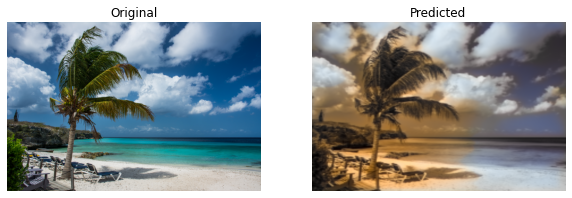

In [23]:
test_image_path = "C:/Users/danie/Documents/The London School of Economics/ST449 Artificial Intelligence and Deep Learning/Project/Validation Data/data/0806x2.png"
predict_and_show(test_image_path)